# FIFA 20 Player Analysis

#### This notebook is dedicated to soccer, and more specifically, the FIFA 20 video game. It will look at the stats of the in-game players and compare them to one another, and ultimately statstically cluster the players in a novel way.

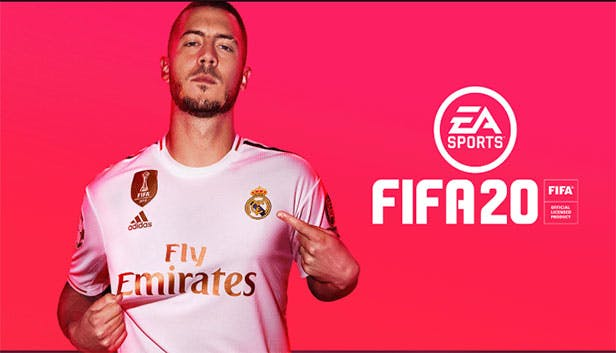

In [63]:
import IPython

url = 'https://user-images.githubusercontent.com/58672183/78079008-3e332e00-7379-11ea-928c-324c826b2b29.jpg'
IPython.display.Image(url, width = 600)

### What's in a Position?

As this notebook is about soccer and positions in soccer, it's helpful to have a general idea of what the positions are. The players move fluidly around the field, so sometimes there is a little bit of ambiguity to positions. With that said, we can use the following template for a general idea of how teams at least think they line up.

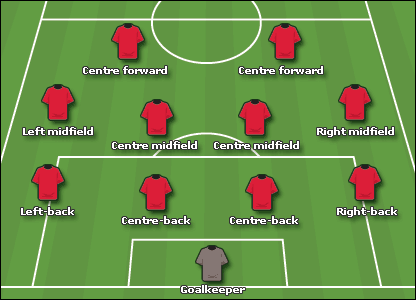

In [52]:
url = 'https://user-images.githubusercontent.com/58672183/78084494-59f10100-7386-11ea-8a5a-1697146ecd2e.gif'
IPython.display.Image(url, width = 600)

(Note that this picture is oriented such that the team is attacking a goal on the top of the picture)
The positions listed here are by no means the only formation possible, but this is one very popular formation. More specifically, it is called "4-4-2" due to the prescence of four backs, four midfielders, and two forwards. It works for the purpose of explaining what will be done next. Every player in FIFA 20 has individual attributes and their preferred position(s). The question I try to answer is: are the prescriptive positions (the ones above) really the best way of describing the roles the players actually have on the field?

### Bringing in the Dataset

I bring in the full FIFA 20 dataset with full stats for every player.

In [1]:
import pandas as pd

In [2]:
players = pd.read_csv(r'C:\Users\Daniel_Heffley\Desktop\FIFA Stats\players_20.csv')

In [3]:
players.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,6/24/1987,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,2/5/1985,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,2/5/1992,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1/7/1993,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1/7/1991,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [4]:
players.shape

(18278, 104)

The first thing I'll do is exclude all of the goalkeepers from the dataset as their position on the field is fixed and their player statistics are quite different in general from non-goalkeepers.

In [6]:
players = players[players['player_positions'] != 'GK']

In [7]:
players.shape

(16242, 104)

I will now just drop all of the lines in dataset with missing data. There are non-numerical categories that are missing from some players, so I can drop those.

In [8]:
players.dropna(axis = 1, inplace = True)

Here are the remaining column headers and their data types.

In [9]:
list(zip(players.columns,players.dtypes))

[('sofifa_id', dtype('int64')),
 ('player_url', dtype('O')),
 ('short_name', dtype('O')),
 ('long_name', dtype('O')),
 ('age', dtype('int64')),
 ('dob', dtype('O')),
 ('height_cm', dtype('int64')),
 ('weight_kg', dtype('int64')),
 ('nationality', dtype('O')),
 ('club', dtype('O')),
 ('overall', dtype('int64')),
 ('potential', dtype('int64')),
 ('value_eur', dtype('int64')),
 ('wage_eur', dtype('int64')),
 ('player_positions', dtype('O')),
 ('preferred_foot', dtype('O')),
 ('international_reputation', dtype('int64')),
 ('weak_foot', dtype('int64')),
 ('skill_moves', dtype('int64')),
 ('work_rate', dtype('O')),
 ('body_type', dtype('O')),
 ('real_face', dtype('O')),
 ('pace', dtype('float64')),
 ('shooting', dtype('float64')),
 ('passing', dtype('float64')),
 ('dribbling', dtype('float64')),
 ('defending', dtype('float64')),
 ('physic', dtype('float64')),
 ('attacking_crossing', dtype('int64')),
 ('attacking_finishing', dtype('int64')),
 ('attacking_heading_accuracy', dtype('int64')),
 (

We will save the player names and use them later.

In [10]:
player_names = players['long_name']

We will now only keep the columns that are numerical data.

In [11]:
players = players.select_dtypes(include = 'number')#keep only numerical columns

In [12]:
list(zip(players.columns,players.dtypes)) #list out remaining columns

[('sofifa_id', dtype('int64')),
 ('age', dtype('int64')),
 ('height_cm', dtype('int64')),
 ('weight_kg', dtype('int64')),
 ('overall', dtype('int64')),
 ('potential', dtype('int64')),
 ('value_eur', dtype('int64')),
 ('wage_eur', dtype('int64')),
 ('international_reputation', dtype('int64')),
 ('weak_foot', dtype('int64')),
 ('skill_moves', dtype('int64')),
 ('pace', dtype('float64')),
 ('shooting', dtype('float64')),
 ('passing', dtype('float64')),
 ('dribbling', dtype('float64')),
 ('defending', dtype('float64')),
 ('physic', dtype('float64')),
 ('attacking_crossing', dtype('int64')),
 ('attacking_finishing', dtype('int64')),
 ('attacking_heading_accuracy', dtype('int64')),
 ('attacking_short_passing', dtype('int64')),
 ('attacking_volleys', dtype('int64')),
 ('skill_dribbling', dtype('int64')),
 ('skill_curve', dtype('int64')),
 ('skill_fk_accuracy', dtype('int64')),
 ('skill_long_passing', dtype('int64')),
 ('skill_ball_control', dtype('int64')),
 ('movement_acceleration', dtype('i

The ID and age aren't important statistics

In [13]:
players = players.drop(['sofifa_id','age'],axis =1)

In [14]:
list(zip(players.columns,players.dtypes))

[('height_cm', dtype('int64')),
 ('weight_kg', dtype('int64')),
 ('overall', dtype('int64')),
 ('potential', dtype('int64')),
 ('value_eur', dtype('int64')),
 ('wage_eur', dtype('int64')),
 ('international_reputation', dtype('int64')),
 ('weak_foot', dtype('int64')),
 ('skill_moves', dtype('int64')),
 ('pace', dtype('float64')),
 ('shooting', dtype('float64')),
 ('passing', dtype('float64')),
 ('dribbling', dtype('float64')),
 ('defending', dtype('float64')),
 ('physic', dtype('float64')),
 ('attacking_crossing', dtype('int64')),
 ('attacking_finishing', dtype('int64')),
 ('attacking_heading_accuracy', dtype('int64')),
 ('attacking_short_passing', dtype('int64')),
 ('attacking_volleys', dtype('int64')),
 ('skill_dribbling', dtype('int64')),
 ('skill_curve', dtype('int64')),
 ('skill_fk_accuracy', dtype('int64')),
 ('skill_long_passing', dtype('int64')),
 ('skill_ball_control', dtype('int64')),
 ('movement_acceleration', dtype('int64')),
 ('movement_sprint_speed', dtype('int64')),
 ('mo

Get rid of all the goalkeeping stats as the goalkeepers were dropped

In [15]:
drop_list = []
for col in players.columns:
    if 'goalkeeping' in col:
        drop_list.append(col)
    

In [16]:
drop_list

['goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes']

In [17]:
players = players.drop(drop_list,axis =1)

We can now see the final attributes that will be used for analysis.

In [18]:
list(zip(players.columns,players.dtypes))

[('height_cm', dtype('int64')),
 ('weight_kg', dtype('int64')),
 ('overall', dtype('int64')),
 ('potential', dtype('int64')),
 ('value_eur', dtype('int64')),
 ('wage_eur', dtype('int64')),
 ('international_reputation', dtype('int64')),
 ('weak_foot', dtype('int64')),
 ('skill_moves', dtype('int64')),
 ('pace', dtype('float64')),
 ('shooting', dtype('float64')),
 ('passing', dtype('float64')),
 ('dribbling', dtype('float64')),
 ('defending', dtype('float64')),
 ('physic', dtype('float64')),
 ('attacking_crossing', dtype('int64')),
 ('attacking_finishing', dtype('int64')),
 ('attacking_heading_accuracy', dtype('int64')),
 ('attacking_short_passing', dtype('int64')),
 ('attacking_volleys', dtype('int64')),
 ('skill_dribbling', dtype('int64')),
 ('skill_curve', dtype('int64')),
 ('skill_fk_accuracy', dtype('int64')),
 ('skill_long_passing', dtype('int64')),
 ('skill_ball_control', dtype('int64')),
 ('movement_acceleration', dtype('int64')),
 ('movement_sprint_speed', dtype('int64')),
 ('mo

In [19]:
players.shape

(16242, 44)

Insert the names back into the dataset.

In [20]:
players['Name'] = player_names

In [21]:
first_20_cols = players.iloc[:, :20]
last_25_cols = players.iloc[:, 20:]

Now we can look at the statiscal distributions of these columns.

In [22]:
first_20_cols.describe()

,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys
count,16242.000000,16242.000000,16242.000000,16242.000000,1.624200e+04,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000
mean,180.475249,74.438493,66.426548,71.729528,2.578808e+06,9806.550917,1.105036,3.002647,2.539527,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,54.180766,49.851188,56.995382,62.728543,46.674116
std,6.454725,6.692058,6.842286,6.081446,5.650534e+06,21828.924637,0.380939,0.638101,0.628193,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,14.044269,16.340531,11.638265,9.619125,14.700085
min,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,2.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,11.000000,10.000000,12.000000,23.000000,10.000000
25%,176.000000,70.000000,62.000000,67.000000,3.500000e+05,1000.000000,1.000000,3.000000,2.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,44.000000,36.000000,49.000000,57.000000,35.000000
50%,180.000000,74.000000,66.000000,71.000000,7.500000e+05,3000.000000,1.000000,3.000000,2.000000,69.000000,54.000000,58.000000,64.000000,56.000000,66.000000,56.000000,52.000000,58.000000,64.000000,46.000000
75%,185.000000,79.000000,71.000000,76.000000,2.300000e+06,9000.000000,1.000000,3.000000,3.000000,75.000000,63.000000,64.000000,69.000000,65.000000,72.000000,65.000000,63.000000,65.000000,69.000000,58.000000
max,203.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,5.000000,96.000000,93.000000,92.000000,96.000000,90.000000,90.000000,93.000000,95.000000,93.000000,92.000000,90.000000


In [23]:
last_25_cols.describe()

,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
count,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,...,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000
mean,60.856360,51.434491,46.282478,56.136929,63.322189,67.635821,67.742950,66.478759,62.152198,66.520256,...,51.147149,59.475988,50.121229,54.989780,55.558490,51.998338,60.460781,50.879571,51.863995,49.590445
std,12.346669,15.094479,14.994287,12.301053,9.952176,11.800788,11.548859,12.281811,8.807388,12.174540,...,15.782163,14.326789,18.856113,14.582565,12.819629,12.437148,10.212126,17.443311,19.047749,19.046176
min,16.000000,11.000000,10.000000,19.000000,24.000000,20.000000,25.000000,23.000000,31.000000,22.000000,...,11.000000,10.000000,10.000000,11.000000,12.000000,11.000000,27.000000,10.000000,10.000000,10.000000
25%,55.000000,40.000000,34.000000,48.000000,58.000000,61.000000,62.000000,59.000000,56.000000,60.000000,...,39.000000,50.000000,33.000000,47.000000,47.000000,42.000000,53.000000,36.000000,35.000000,32.000000
50%,63.000000,52.000000,44.000000,58.000000,64.000000,68.000000,69.000000,68.000000,62.000000,68.000000,...,54.000000,61.000000,55.000000,57.000000,57.000000,52.000000,61.000000,55.000000,58.000000,56.000000
75%,69.000000,63.000000,58.000000,65.000000,70.000000,76.000000,75.000000,75.000000,68.000000,75.000000,...,63.000000,70.000000,65.000000,65.000000,65.000000,61.000000,68.000000,65.000000,67.000000,65.000000
max,97.000000,94.000000,94.000000,92.000000,96.000000,97.000000,96.000000,96.000000,96.000000,97.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,92.000000,90.000000


The stats are generally very evenly distributed; means very close to the medians. This actually makes sense that the game developers are manually setting attributes for all of the players. They want to make the stat distributions for all of the players in the game to be roughly symmetrical and normal.

In [25]:
list(zip(players.columns,players.dtypes))

[('height_cm', dtype('int64')),
 ('weight_kg', dtype('int64')),
 ('overall', dtype('int64')),
 ('potential', dtype('int64')),
 ('value_eur', dtype('int64')),
 ('wage_eur', dtype('int64')),
 ('international_reputation', dtype('int64')),
 ('weak_foot', dtype('int64')),
 ('skill_moves', dtype('int64')),
 ('pace', dtype('float64')),
 ('shooting', dtype('float64')),
 ('passing', dtype('float64')),
 ('dribbling', dtype('float64')),
 ('defending', dtype('float64')),
 ('physic', dtype('float64')),
 ('attacking_crossing', dtype('int64')),
 ('attacking_finishing', dtype('int64')),
 ('attacking_heading_accuracy', dtype('int64')),
 ('attacking_short_passing', dtype('int64')),
 ('attacking_volleys', dtype('int64')),
 ('skill_dribbling', dtype('int64')),
 ('skill_curve', dtype('int64')),
 ('skill_fk_accuracy', dtype('int64')),
 ('skill_long_passing', dtype('int64')),
 ('skill_ball_control', dtype('int64')),
 ('movement_acceleration', dtype('int64')),
 ('movement_sprint_speed', dtype('int64')),
 ('mo

There is an extra step I will do here to try to make player to player comparisons more fair. As the best players in the game generally have higher stats across all categories, we need to compare statistics from one player just to other statistics of that same player. The goal is to find the ratios between the statistics of players. Here I divided the statistics by the overall statistic of each player.

In [26]:
for feature in players.columns:
    if feature in ['height_cm','weight_kg','overall','potential','value_eur','wage_eur','international_reputation','weak_foot','skill_moves','Name']:
        continue
    else:
        players[feature] = players[feature].astype(int) / players['overall'].astype(int)

In [27]:
first_20_cols = players.iloc[:, :20]
last_25_cols = players.iloc[:, 20:]

In [28]:
first_20_cols.describe()

,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys
count,16242.000000,16242.000000,16242.000000,16242.000000,1.624200e+04,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000
mean,180.475249,74.438493,66.426548,71.729528,2.578808e+06,9806.550917,1.105036,3.002647,2.539527,1.027436,0.784835,0.859682,0.941795,0.775716,0.979003,0.813310,0.748472,0.858269,0.943201,0.699596
std,6.454725,6.692058,6.842286,6.081446,5.650534e+06,21828.924637,0.380939,0.638101,0.628193,0.184982,0.185027,0.117239,0.125266,0.231595,0.128984,0.184175,0.227227,0.151364,0.102829,0.194751
min,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,2.000000,0.384615,0.211268,0.409836,0.435484,0.240000,0.469697,0.142857,0.166667,0.190476,0.439394,0.150685
25%,176.000000,70.000000,62.000000,67.000000,3.500000e+05,1000.000000,1.000000,3.000000,2.000000,0.921053,0.645161,0.788462,0.901408,0.545455,0.901408,0.693548,0.559322,0.758065,0.892308,0.538462
50%,180.000000,74.000000,66.000000,71.000000,7.500000e+05,3000.000000,1.000000,3.000000,2.000000,1.045455,0.836364,0.888889,0.981481,0.900000,1.000000,0.866667,0.800000,0.878788,0.957143,0.721311
75%,185.000000,79.000000,71.000000,76.000000,2.300000e+06,9000.000000,1.000000,3.000000,3.000000,1.152542,0.939394,0.948052,1.027027,0.970149,1.068966,0.954545,0.942857,0.972222,1.014085,0.859375
max,203.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,5.000000,1.611111,1.181818,1.137931,1.277778,1.134615,1.387097,1.220000,1.200000,1.367347,1.244898,1.235294


In [29]:
last_25_cols.describe()

,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
count,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,...,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000
mean,0.915717,0.770656,0.693581,0.842607,0.952026,1.026610,1.027947,1.007019,0.933844,1.011097,...,0.765445,0.894326,0.752724,0.826500,0.834627,0.783359,0.906982,0.765017,0.781111,0.747753
std,0.159576,0.196972,0.199624,0.154586,0.106238,0.192766,0.188038,0.190212,0.071526,0.206644,...,0.208235,0.191830,0.267715,0.195125,0.163143,0.170281,0.097594,0.246573,0.275532,0.277516
min,0.242857,0.166667,0.117647,0.295775,0.396825,0.363636,0.371795,0.337662,0.568966,0.358974,...,0.141176,0.188679,0.133333,0.166667,0.183099,0.171053,0.415385,0.121951,0.138889,0.133333
25%,0.867647,0.629032,0.537037,0.750000,0.916667,0.914634,0.923077,0.898551,0.893939,0.890411,...,0.622951,0.774648,0.492754,0.738462,0.741379,0.655172,0.846154,0.552632,0.523077,0.484375
50%,0.964286,0.796875,0.677966,0.874209,0.983607,1.046154,1.044776,1.018868,0.941176,1.015873,...,0.825397,0.930556,0.890625,0.892308,0.875000,0.791045,0.916667,0.876628,0.929825,0.888889
75%,1.016393,0.926471,0.855072,0.958904,1.016129,1.157143,1.153846,1.131148,0.984127,1.144928,...,0.927536,1.029851,0.969697,0.968254,0.958333,0.916667,0.973684,0.967213,1.000000,0.971429
max,1.314815,1.295082,1.346154,1.301887,1.296296,1.629630,1.647059,1.788462,1.216667,1.807692,...,1.218750,1.500000,1.161290,1.265306,1.280000,1.320755,1.322581,1.326923,1.250000,1.235294


The medians are still pretty close to the means, though this has made the statistics a little less normal and symmestrical.

In [31]:
players.shape

(16242, 45)

## Scaling the Data and Clustering the Players

Scaling the data is important because the different categories may use different numerical scales. This process makes the data use the same numerical scale so that when the data is clustered, the euclidean distances between all of the different attributes are the same euclidean distance.

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

drop_list = ['Name','height_cm','weight_kg','overall','potential','value_eur','wage_eur','international_reputation']

X = players.drop(drop_list,axis = 1)

X_scaled = scaler.fit_transform(X)

Using this scaled data, we can now do what I set out to do; cluster the players. The K-means approach places each player in the cluster whose mean is closest to the attributes of the player. For this example, I partitioned the players into 3 groups as it produced the best insights.

In [34]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=1)

In [35]:
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [57]:
players['cluster'] = km.labels_ #Add cluster labels to dataset

In [56]:
players.to_csv(r'kmeansresults.csv') #Output csv

In [38]:
from sklearn import metrics
metrics.silhouette_score(X_scaled, km.labels_, metric='euclidean')

0.20637026233290157

The silhouette score is a measure of how well spread the different clusters are. A score of 1 is the best possible.
Given that the silhouette score for the clusters is low, one might think that these clusters are not useful. That is not the case though as you will see that the clusters partition players in a very logical manner.

## Reviewing the Player Clustering

Now it is time to review the players' clusters. If you are a fan of soccer and have some familiarity with famous players, you will find this section a little bit easier to follow; if you are not don't worry! I will give some background on the relationship seen between players, their positions, and the clusters they find themselves in.

In [60]:
clusters = pd.read_csv(r'C:\Users\Daniel_Heffley\Desktop\FIFA Stats\FIFA Player Clusters.csv')

In [61]:
clusters.style.hide_index()

Name,Cluster
Lionel Andrés Messi Cuccittini,2
Cristiano Ronaldo dos Santos Aveiro,2
Neymar da Silva Santos Junior,2
Eden Hazard,2
Kevin De Bruyne,2
Virgil van Dijk,0
Luka Modrić,1
Mohamed Salah Ghaly,2
Kylian Mbappé,2
Kalidou Koulibaly,0


The above table shows the top 50 rated non-goalkeeper players in FIFA 20 and the cluster to which they were assigned. One could potentially review the entire list of players and see where all the players lie, but I think looking at these more noteworthy players is sufficiently representative. An astute observer may notice right away the prepoderance of "2" players. As it turns out, the "2" group ended up being the attacking minded players; I.E the biggest goal scorers. The developers definitely showed a preference for goal scorers in their rating system, and it shows in their top rated player list. 

In order to match these clusters to the prescriptive positions shown at the top of this notebook, I made the following graphic to show how players from different prescriptive positions were generally clustered.

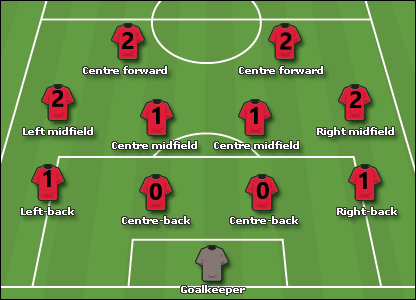

In [64]:
url = 'https://user-images.githubusercontent.com/58672183/78318202-31a60580-7532-11ea-8de6-09787d063965.png'
IPython.display.Image(url, width = 600)

(Note that this picture is oriented such that the team is attacking a goal on the top of the picture) 
The above clusters by position may look a little odd. Why would outside defenders not be grouped with central defenders? And why are they instead clustered with central midfielders? This may be best answered by taking a look at where players actually take up position during a real life game.

## Comparing Heat Maps

Recall from before when I called the above positions the "prescriptive" positions players take up on the field. I specifically referred to them as prescriptive because they are not always where data says the players actually are on the field. The below map shows the average positions of the 10 non-goalkeeper players of Wolverhampton Wanderers of the English Premier League during their March 1st, 2020 match again Tottenham Hotspur. (Note that the numbers in the circles refer to the players' jersey numbers)

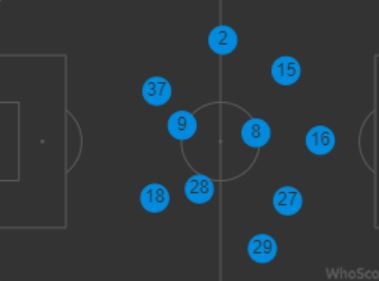

In [65]:
url = 'https://user-images.githubusercontent.com/58672183/78319955-52705a00-7536-11ea-82d5-ef7aa5480242.JPG'
IPython.display.Image(url, width = 600)

(Note that this picture is oriented such that Wolverhampton is attacking a goal on the left side of the picture) 
At a glance, can you match these dots to the prescriptive positions from above? Probably not that easily. To throw an extra wrinkle into this, the prescriptive formation Wolverhampton used on this day would best be described as "3-4-3"; three backs, four midfielders, and three forwards.

The most striking thing about this map is the lack of easily delineated sectors on the field and the lack of neatly aligned rows as it was in the prescriptive formation chart. This is the reality of real world data though, and the only reason we create prescriptive names for positions and formations is for our own sanity. To show just how messy it can be, let's review Tottenham's average position chart for the same match.

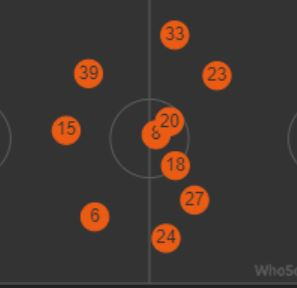

In [67]:
url = 'https://user-images.githubusercontent.com/58672183/78321123-22768600-7539-11ea-986f-e3b0d4a27f51.JPG'
IPython.display.Image(url, width = 500)

(Note that this picture is oriented such that Tottenham is attacking a goal on the right side of the picture)  How could we classify this formation? Maybe we could call it "3-7-0" or even "3-0-7"? I think in a way it defies really concise classification.

Let's revisit why I showed these average position charts in the first place. What do these average position charts tell us about the player clusters I made? I think it can definitely give a motivation for classifying the players as they were. Observe the following delineations I made in the Wolverhampton player chart. It shows we can make a natural delineation among the players that pretty closely partition them according to their player cluster.

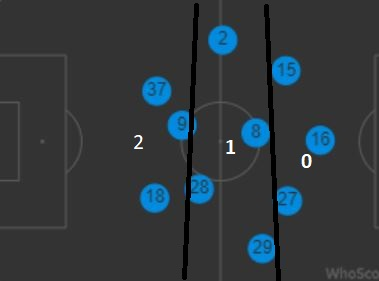

In [71]:
url = 'https://user-images.githubusercontent.com/58672183/78321865-17245a00-753b-11ea-9460-89b13c74f9d1.jpg'
IPython.display.Image(url, width = 400)

(Note that this picture is oriented such that Wolverhampton is attacking a goal on the left side of the picture) 
If we look at cluster "0", we will see numbers 15, 16, and 27. Note that they are all prescriptively center-backs, meaning that the "0" cluster is focused on the most defensive players on the field. Cluster "1" is interesting because it houses the left and right backs as well as the center midfielders. Note that number 2 is prescriptively a right-back and number 29 is prescriptively a left-back. Numbers 8 and 29 are both prescriptively center-midfielders. This average position chart though shows a positional congruence between the right-back, left-back, and center-midfielders. In cluster "2", we see the players closest to the opposition goal. Note that the "2" cluster players in this picture are all either center forwards, right midfielders, or left midfielders.

## Conclusion

We can see a definite relationship between average position taken up on the field and the statistical cluster a player is placed in. It's hard for me to say whether the FIFA game developers had these average position player charts in mind while they were assigning statiscal attributes to players, or whether they just coincidentally assigned statistics such that players who take up similar positions on the field in real life had similar statiscal profiles. I would like to think it is the latter, but I cannot be 100% sure. 

In the future, I could see an opporunity for a preditive model based on the above charts and data. One idea is to predict a player's average position in a given match based on his FIFA statisical profile, or conversely, predict his FIFA statiscal profile based on his average position during a match. As far as a use case for this, maybe the FIFA game developers could use the average position charts to assign statistics to new players who haven't appeared in previous editions of the game. There are thousands of players to scout in any given year, anything to make the process more automated would most likely be much appreciated.